In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("_immunization_disparities_dataset.csv")

In [3]:
data.head()

,Age,Gender,Region,State,Community,Vaccination_Status
0,67,Female,Rural,Punjab,SC,0
1,71,Female,Urban,Arunachal Pradesh,ST,1
2,52,Female,Rural,Sikkim,OBC,0
3,29,Female,Rural,Tripura,General,0
4,64,Male,Urban,Meghalaya,ST,1


In [4]:
data["Age"].value_counts()

Age
67    51
38    49
70    48
25    47
71    46
      ..
72    28
63    27
43    27
46    26
44    24
Name: count, Length: 68, dtype: int64

In [5]:
data.isnull().sum() , data.isna().sum()

(Age                   0
 Gender                0
 Region                0
 State                 0
 Community             0
 Vaccination_Status    0
 dtype: int64,
 Age                   0
 Gender                0
 Region                0
 State                 0
 Community             0
 Vaccination_Status    0
 dtype: int64)

In [6]:
col = data.columns
col

Index(['Age', 'Gender', 'Region', 'State', 'Community', 'Vaccination_Status'], dtype='object')

In [7]:
data.duplicated().sum()

80

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.describe()

,Age,Vaccination_Status
count,2420.000000,2420.000000
mean,51.230165,0.423140
std,19.433851,0.494159
min,18.000000,0.000000
25%,34.000000,0.000000
50%,51.000000,0.000000
75%,68.000000,1.000000
max,85.000000,1.000000


# *Categorical columns*

In [10]:
catigorical_columns = data.select_dtypes(exclude="number")

In [11]:
catigorical_columns.columns

Index(['Gender', 'Region', 'State', 'Community'], dtype='object')

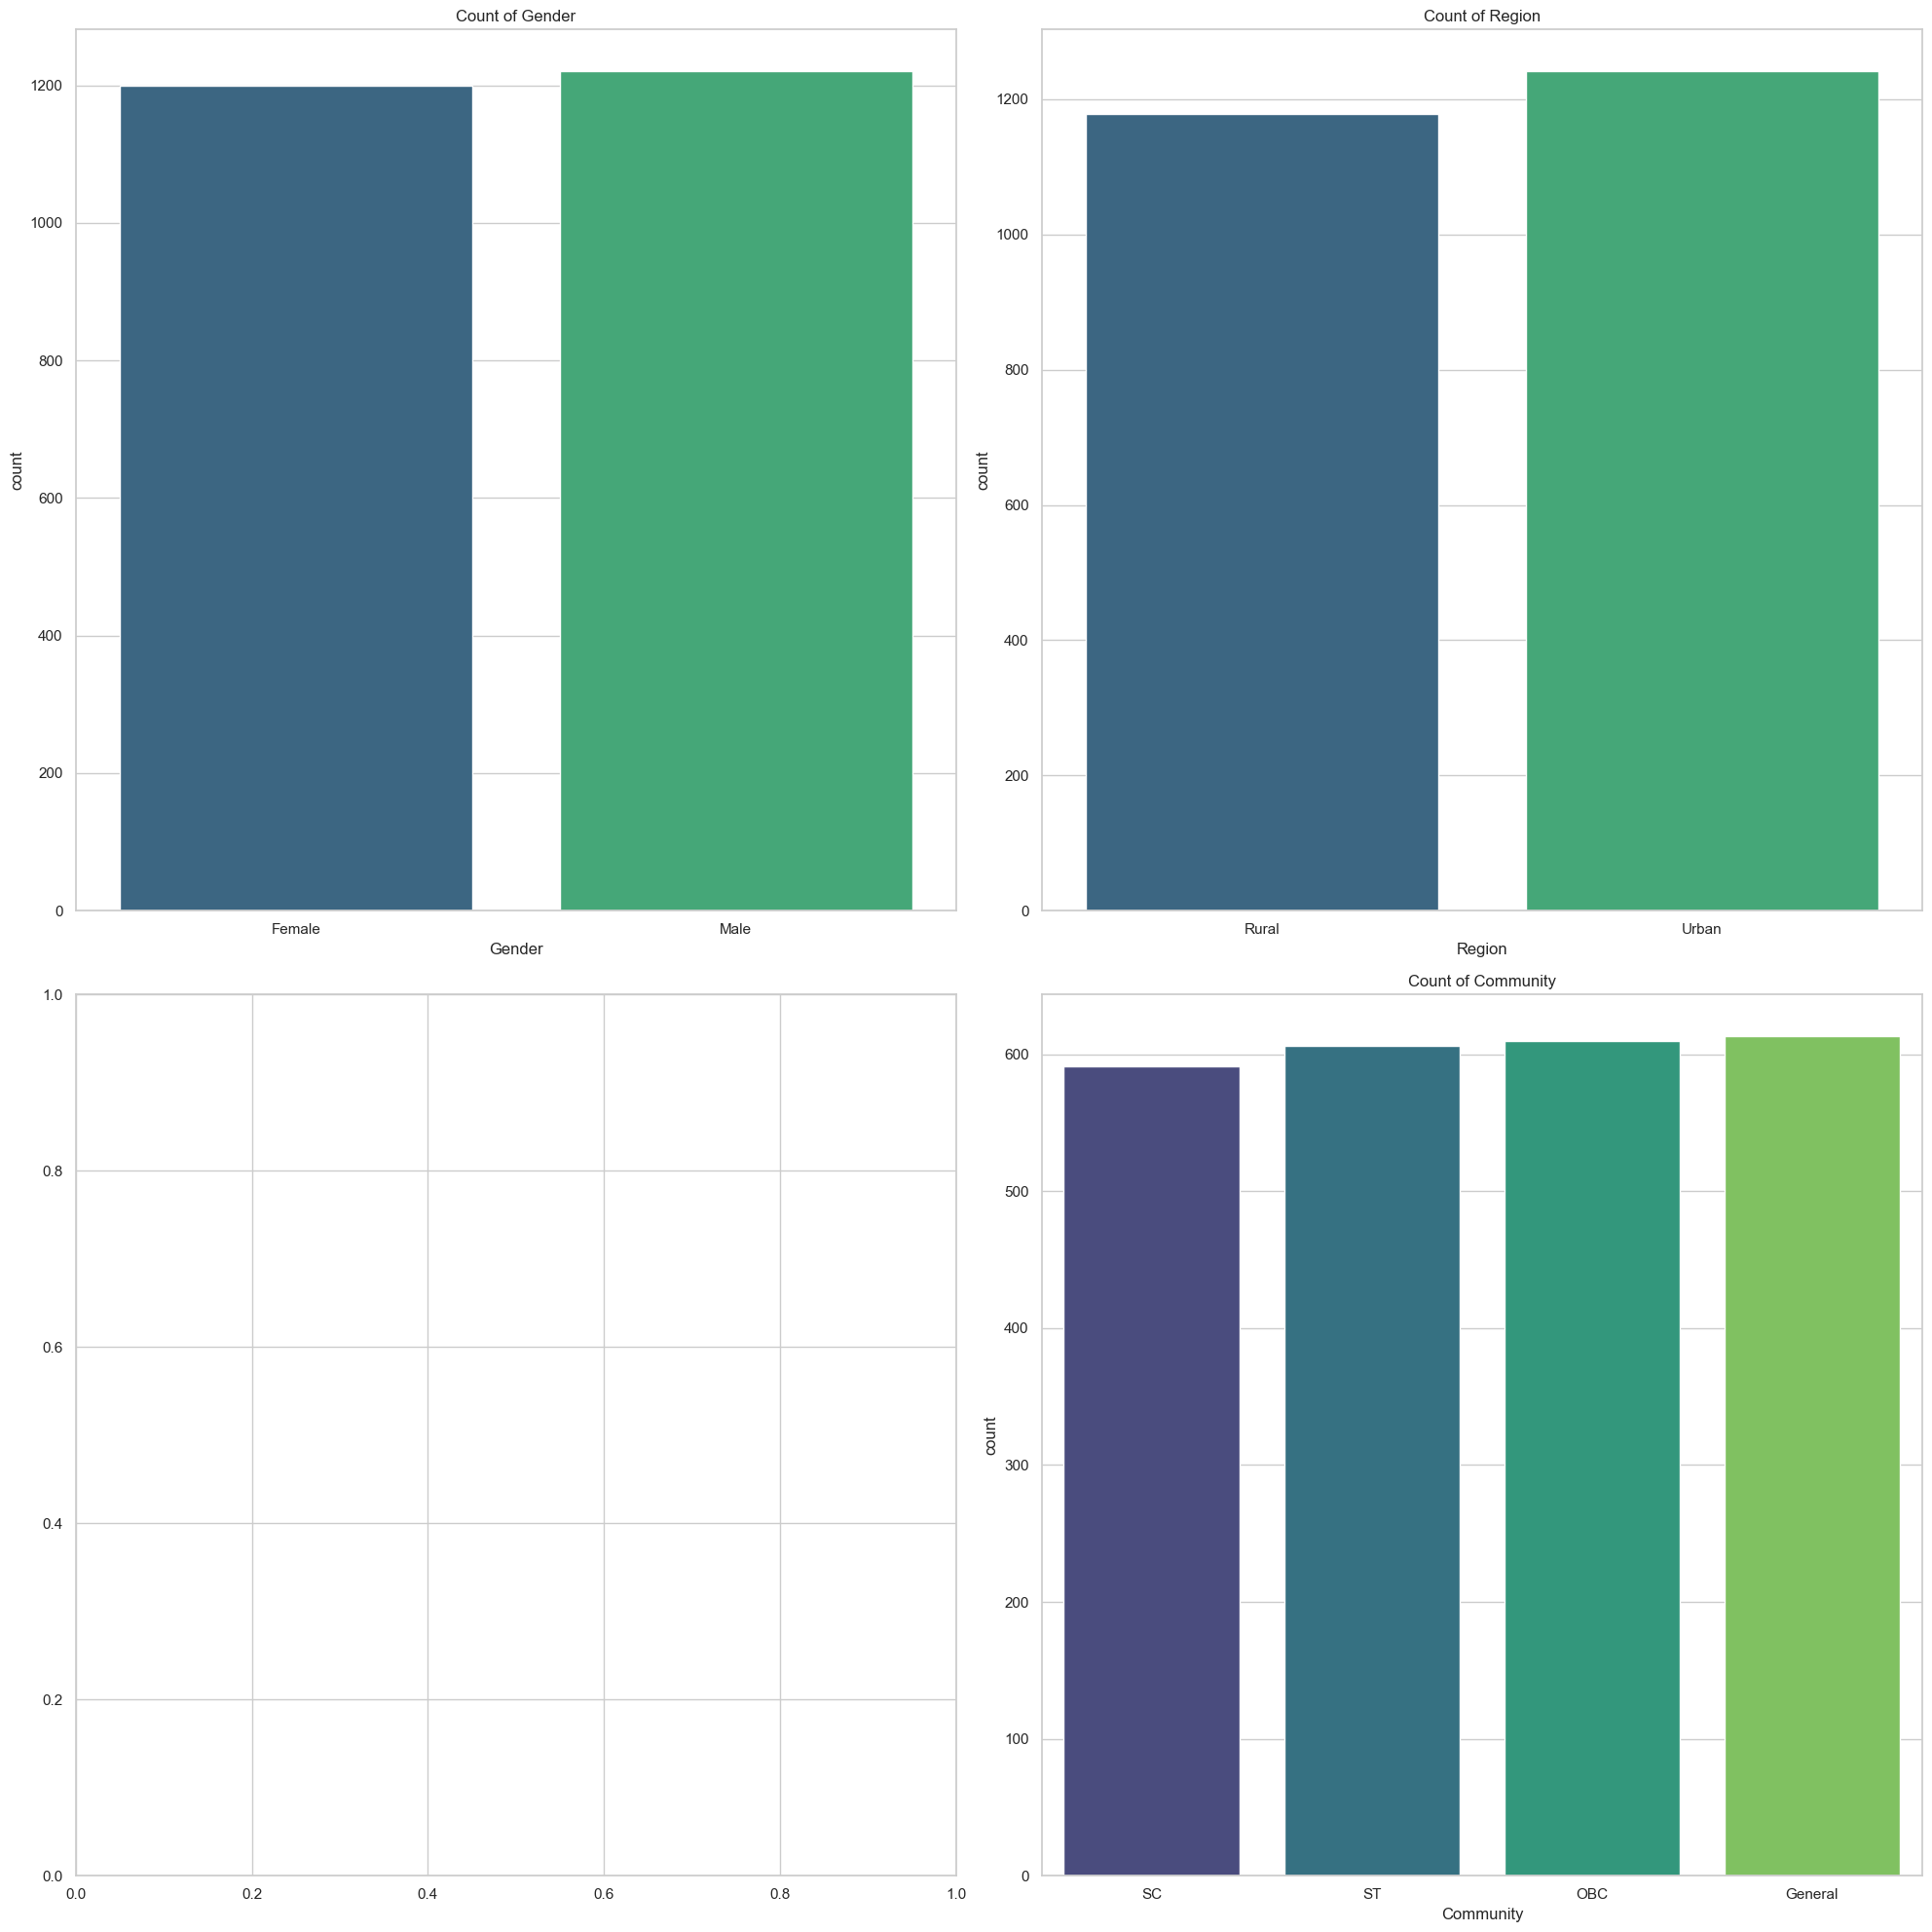

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(20, 5 * 4))
axes = axes.flatten()
for i, col in enumerate(catigorical_columns.columns):
    if col == 'State':
        continue
    sns.countplot(data=catigorical_columns, x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [13]:
state_counts = catigorical_columns["State"].value_counts()
state_counts

State
Karnataka            111
Goa                  104
Andhra Pradesh        95
Himachal Pradesh      94
Tripura               94
Tamil Nadu            93
Rajasthan             92
Kerala                91
Maharashtra           89
Nagaland              89
Madhya Pradesh        88
Bihar                 88
Uttar Pradesh         87
Telangana             86
West Bengal           86
Arunachal Pradesh     86
Gujarat               85
Jharkhand             84
Assam                 83
Mizoram               81
Haryana               80
Meghalaya             80
Chhattisgarh          78
Sikkim                78
Odisha                77
Uttarakhand           74
Manipur               74
Punjab                73
Name: count, dtype: int64

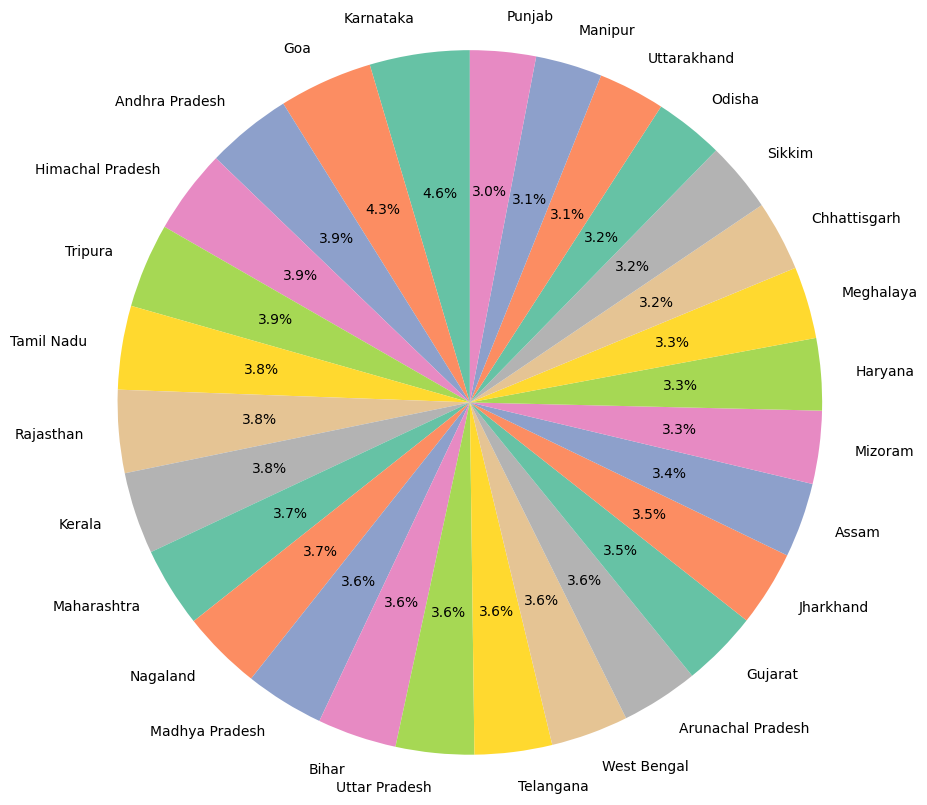

In [14]:
def pie_chart(state):
    colors = sns.color_palette('Set2', n_colors=len(state))
    plt.figure(figsize=(10, 10))
    plt.pie(state, labels=state.index, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.axis('equal') 
    plt.show()
pie_chart(state_counts)


In [15]:
classification_count = data["Vaccination_Status"].value_counts()
classification_count

Vaccination_Status
0    1396
1    1024
Name: count, dtype: int64

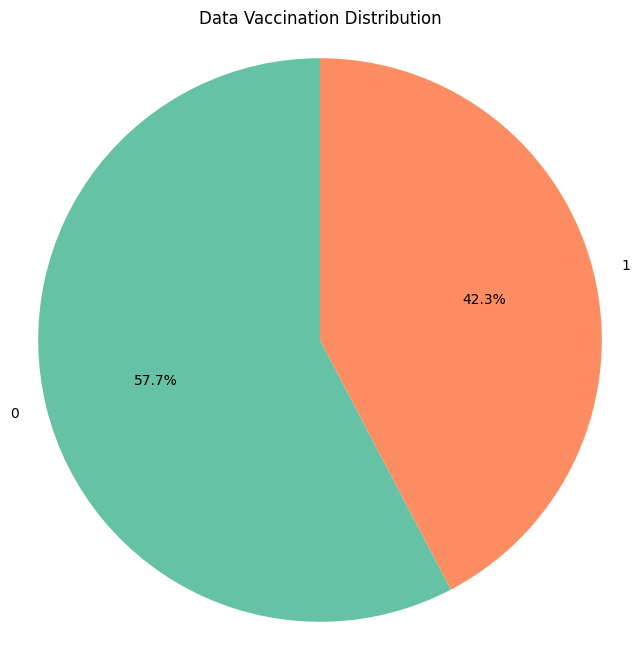

In [16]:
colors = sns.color_palette('Set2', n_colors=len(classification_count))
plt.figure(figsize=(8, 8))
plt.pie(classification_count, labels=classification_count.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Data Vaccination Distribution')
plt.axis('equal') 
plt.show()



## *Considering only vaccinated people and state*

In [17]:
vaccinated_data = data[data["Vaccination_Status"] == 1]
not_vaccinated_data = data[data["Vaccination_Status"] == 0]

In [18]:
age_wise_vaccinated_count = vaccinated_data["Age"].value_counts() 
age_wise_vaccinated_count

Age
67    30
69    27
61    26
64    25
71    24
      ..
32     8
44     8
33     8
46     5
37     4
Name: count, Length: 68, dtype: int64

In [19]:
age_wise_not_vaccinated_count = not_vaccinated_data["Age"].value_counts()

In [31]:
ratio_of_people_vaccinated = age_wise_vaccinated_count/(age_wise_not_vaccinated_count+age_wise_vaccinated_count)*100

In [32]:
len(data[data["Age"] == 18])

38

In [84]:
ratio_of_people_vaccinated

Age
18    42.105263
19    50.000000
20    47.222222
21    55.813953
22    32.352941
        ...    
81    61.538462
82    48.387097
83    44.827586
84    50.000000
85    57.142857
Name: count, Length: 68, dtype: float64

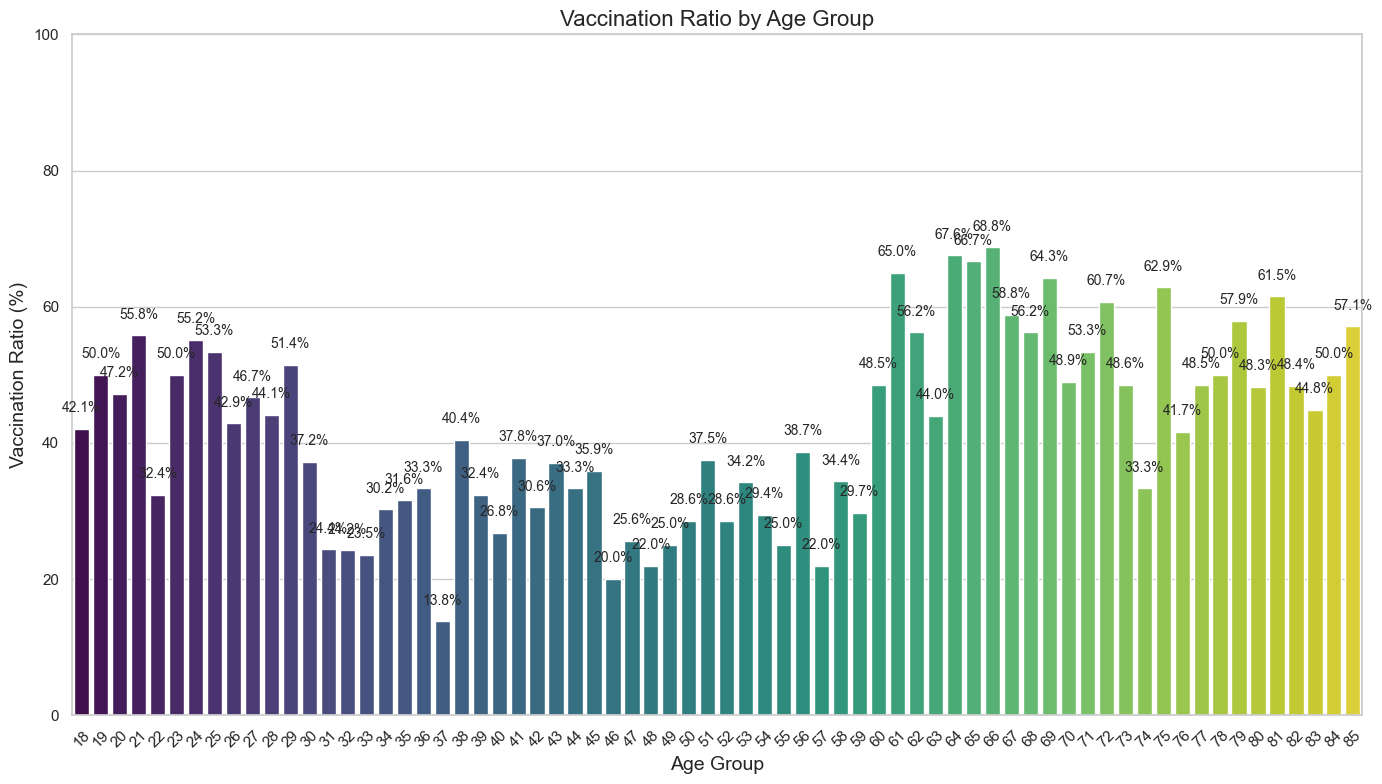

In [96]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x=ratio_of_people_vaccinated.index, y=ratio_of_people_vaccinated.values, palette='viridis')
plt.title('Vaccination Ratio by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Vaccination Ratio (%)', fontsize=14)
plt.ylim(0, 100)
for index, value in enumerate(ratio_of_people_vaccinated):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

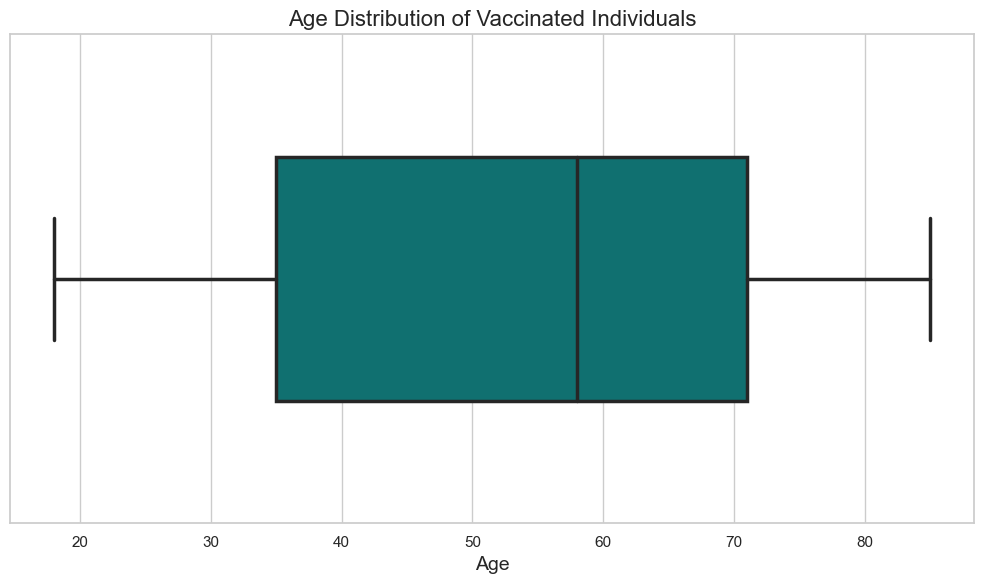

In [97]:
vaccinated_data = data[data["Vaccination_Status"] == 1]["Age"]

# Plotting
sns.set_theme(style="whitegrid") 
plt.figure(figsize=(10, 6))

sns.boxplot(x=vaccinated_data, color='teal', width=0.5, linewidth=2.5)
plt.title('Age Distribution of Vaccinated Individuals', fontsize=16)
plt.xlabel('Age', fontsize=14)

plt.tight_layout()
plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


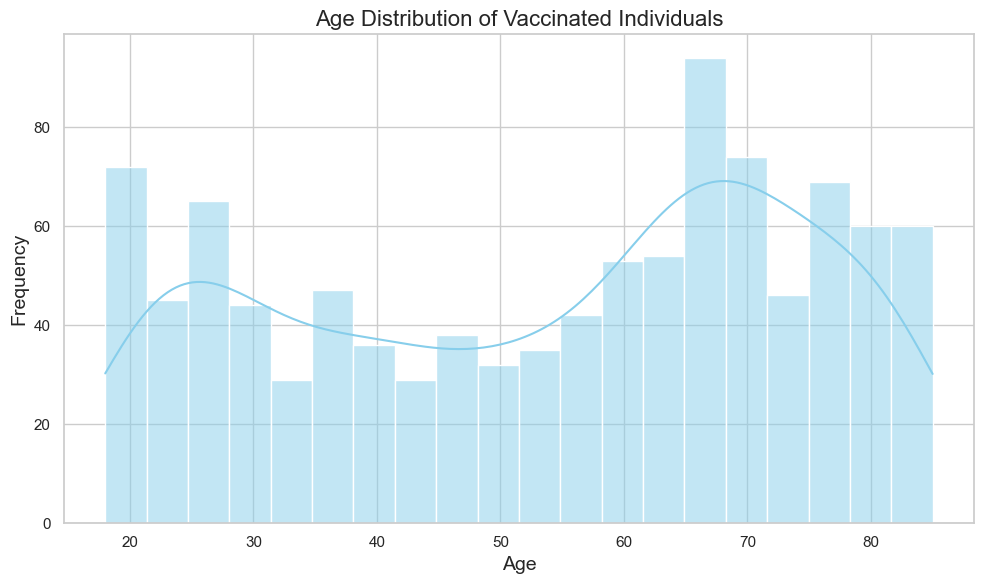

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(vaccinated_data, kde=True, color='skyblue', bins=20)

plt.title('Age Distribution of Vaccinated Individuals', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()


#### *Category wise vaccinated people*

In [24]:
community_wise_not_vaccinated_count = not_vaccinated_data["Community"].value_counts()
community_wise_vaccinated_count = vaccinated_data["Community"].value_counts() 
ratio_of_people_vaccinated = community_wise_vaccinated_count/(community_wise_not_vaccinated_count+community_wise_vaccinated_count)*100

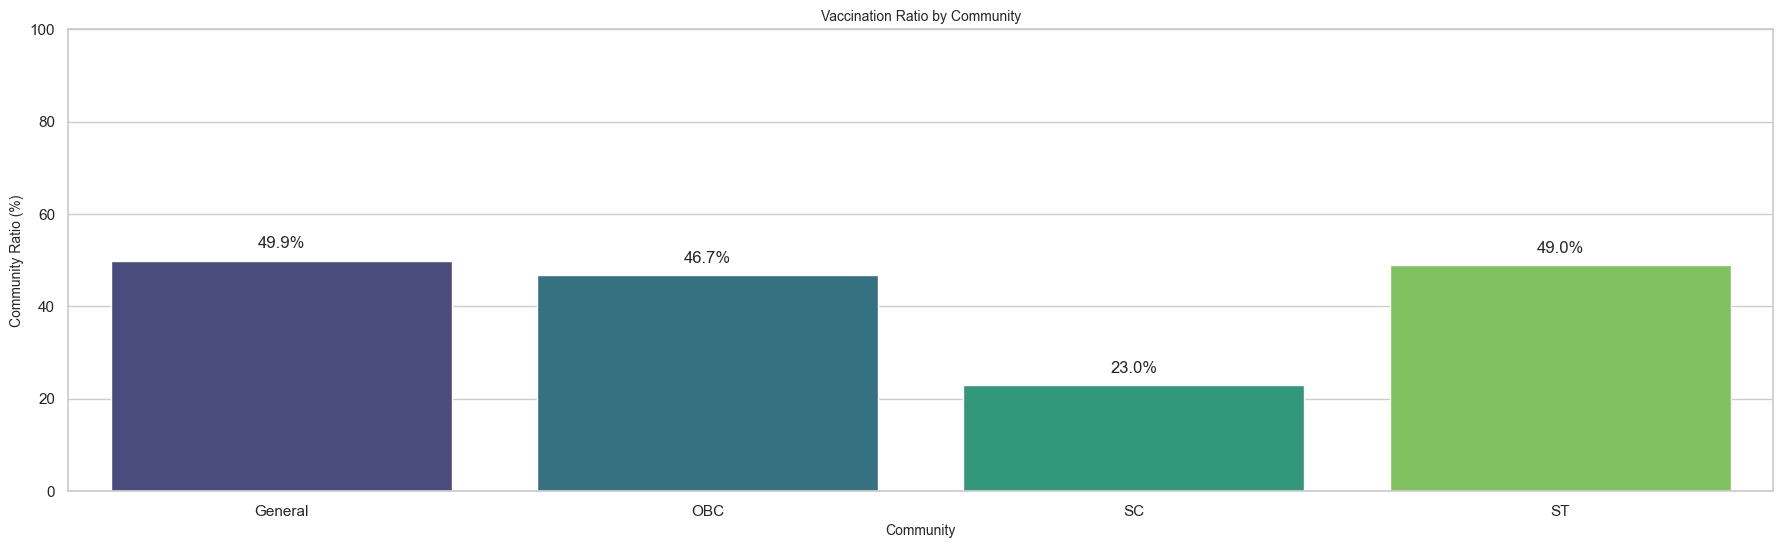

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(22, 6))
sns.barplot(x=ratio_of_people_vaccinated.index, y=ratio_of_people_vaccinated.values, palette='viridis')
plt.title('Vaccination Ratio by Community', fontsize=10)
plt.xlabel('Community', fontsize=10)
plt.ylabel('Community Ratio (%)', fontsize=10)
plt.ylim(0, 100) 
for index, value in enumerate(ratio_of_people_vaccinated):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom')

In [26]:
state_wise_not_vaccinated_count = not_vaccinated_data["State"].value_counts()
state_wise_vaccinated_count = vaccinated_data["State"].value_counts() 
ratio_of_people_vaccinated = state_wise_vaccinated_count/(state_wise_not_vaccinated_count+state_wise_vaccinated_count)*100

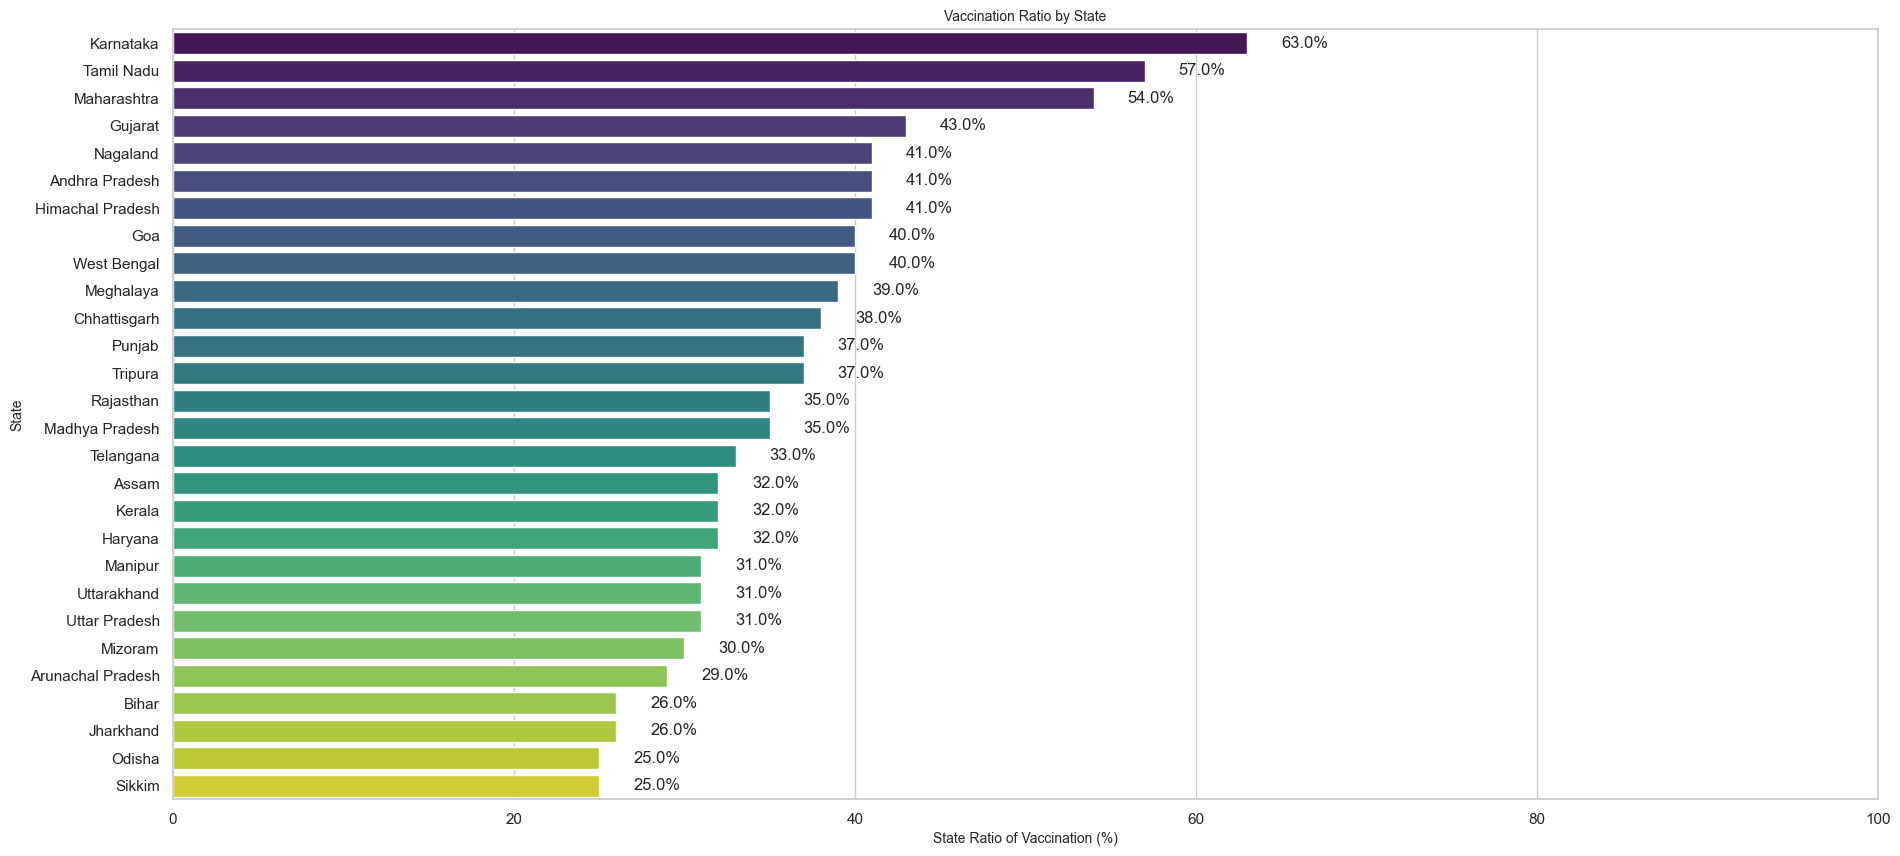

In [27]:
plt.figure(figsize=(22, 10))
sns.barplot(y=state_wise_vaccinated_count.index, x=state_wise_vaccinated_count.values, palette='viridis')

# Add titles and labels
plt.title('Vaccination Ratio by State', fontsize=10)
plt.ylabel('State', fontsize=10)
plt.xlabel('State Ratio of Vaccination (%)', fontsize=10)
plt.xlim(0, 100)
for index, value in enumerate(state_wise_vaccinated_count):
    plt.text(value + 2, index, f'{value:.1f}%', va='center')  
plt.show()

### *Gender wise vaccinated people*

In [82]:
state_male_wise_vaccinated_count = dict()
state_female_wise_vaccinated_count = dict()
states = data["State"].unique()
for state in states:
    male_vaccinated_count = len(data[(data["State"] == state) & (data["Gender"] == "Male") & (data["Vaccination_Status"] == 1)])
    male_total_count = male_vaccinated_count + len(data[(data["State"] == state) & (data["Gender"] == "Male") & (data["Vaccination_Status"] == 0)])
    state_male_wise_vaccinated_count[state] = (male_vaccinated_count / male_total_count) * 100 
    female_vaccinated_count = len(data[(data["State"] == state) & (data["Gender"] == "Female") & (data["Vaccination_Status"] == 1)])
    female_total_count = female_vaccinated_count + len(data[(data["State"] == state) & (data["Gender"] == "Female") & (data["Vaccination_Status"] == 0)])
    state_female_wise_vaccinated_count[state] = (female_vaccinated_count / female_total_count) * 100

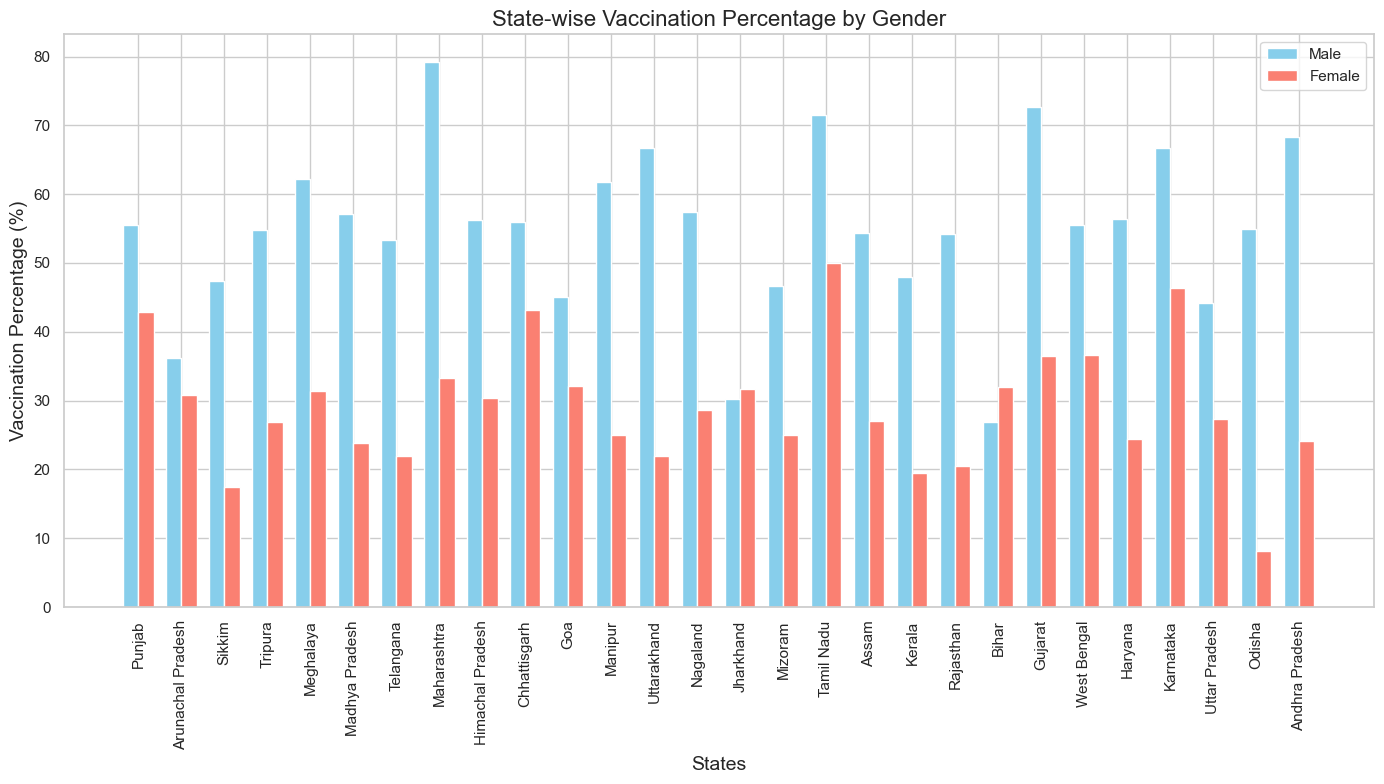

In [83]:
import numpy as np
states = list(state_male_wise_vaccinated_count.keys())
male_percentages = list(state_male_wise_vaccinated_count.values())
female_percentages = list(state_female_wise_vaccinated_count.values())
x = np.arange(len(states))  
width = 0.35  
plt.figure(figsize=(14, 8))
plt.bar(x - width/2, male_percentages, width, label='Male', color='skyblue')
plt.bar(x + width/2, female_percentages, width, label='Female', color='salmon')
plt.xlabel('States', fontsize=14)
plt.ylabel('Vaccination Percentage (%)', fontsize=14)
plt.title('State-wise Vaccination Percentage by Gender', fontsize=16)
plt.xticks(x, states, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [77]:
state_male_wise_vaccinated_count

{'Punjab': 55.55555555555556,
 'Arunachal Pradesh': 36.17021276595745,
 'Sikkim': 47.368421052631575,
 'Tripura': 54.761904761904766,
 'Meghalaya': 62.22222222222222,
 'Madhya Pradesh': 57.14285714285714,
 'Telangana': 53.333333333333336,
 'Maharashtra': 79.24528301886792,
 'Himachal Pradesh': 56.25,
 'Chhattisgarh': 55.88235294117647,
 'Goa': 45.09803921568628,
 'Manipur': 61.76470588235294,
 'Uttarakhand': 66.66666666666666,
 'Nagaland': 57.407407407407405,
 'Jharkhand': 30.23255813953488,
 'Mizoram': 46.666666666666664,
 'Tamil Nadu': 71.42857142857143,
 'Assam': 54.285714285714285,
 'Kerala': 48.0,
 'Rajasthan': 54.166666666666664,
 'Bihar': 26.82926829268293,
 'Gujarat': 72.72727272727273,
 'West Bengal': 55.55555555555556,
 'Haryana': 56.41025641025641,
 'Karnataka': 66.66666666666666,
 'Uttar Pradesh': 44.18604651162791,
 'Odisha': 55.00000000000001,
 'Andhra Pradesh': 68.29268292682927}

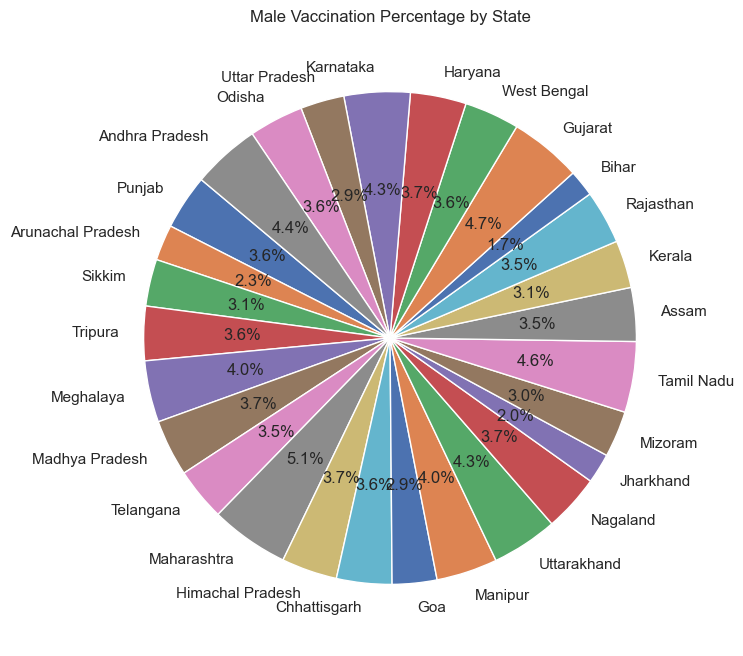

In [78]:
plt.figure(figsize=(10, 8))
plt.pie(state_male_wise_vaccinated_count.values(), labels=state_male_wise_vaccinated_count.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Male Vaccination Percentage by State")
plt.show()

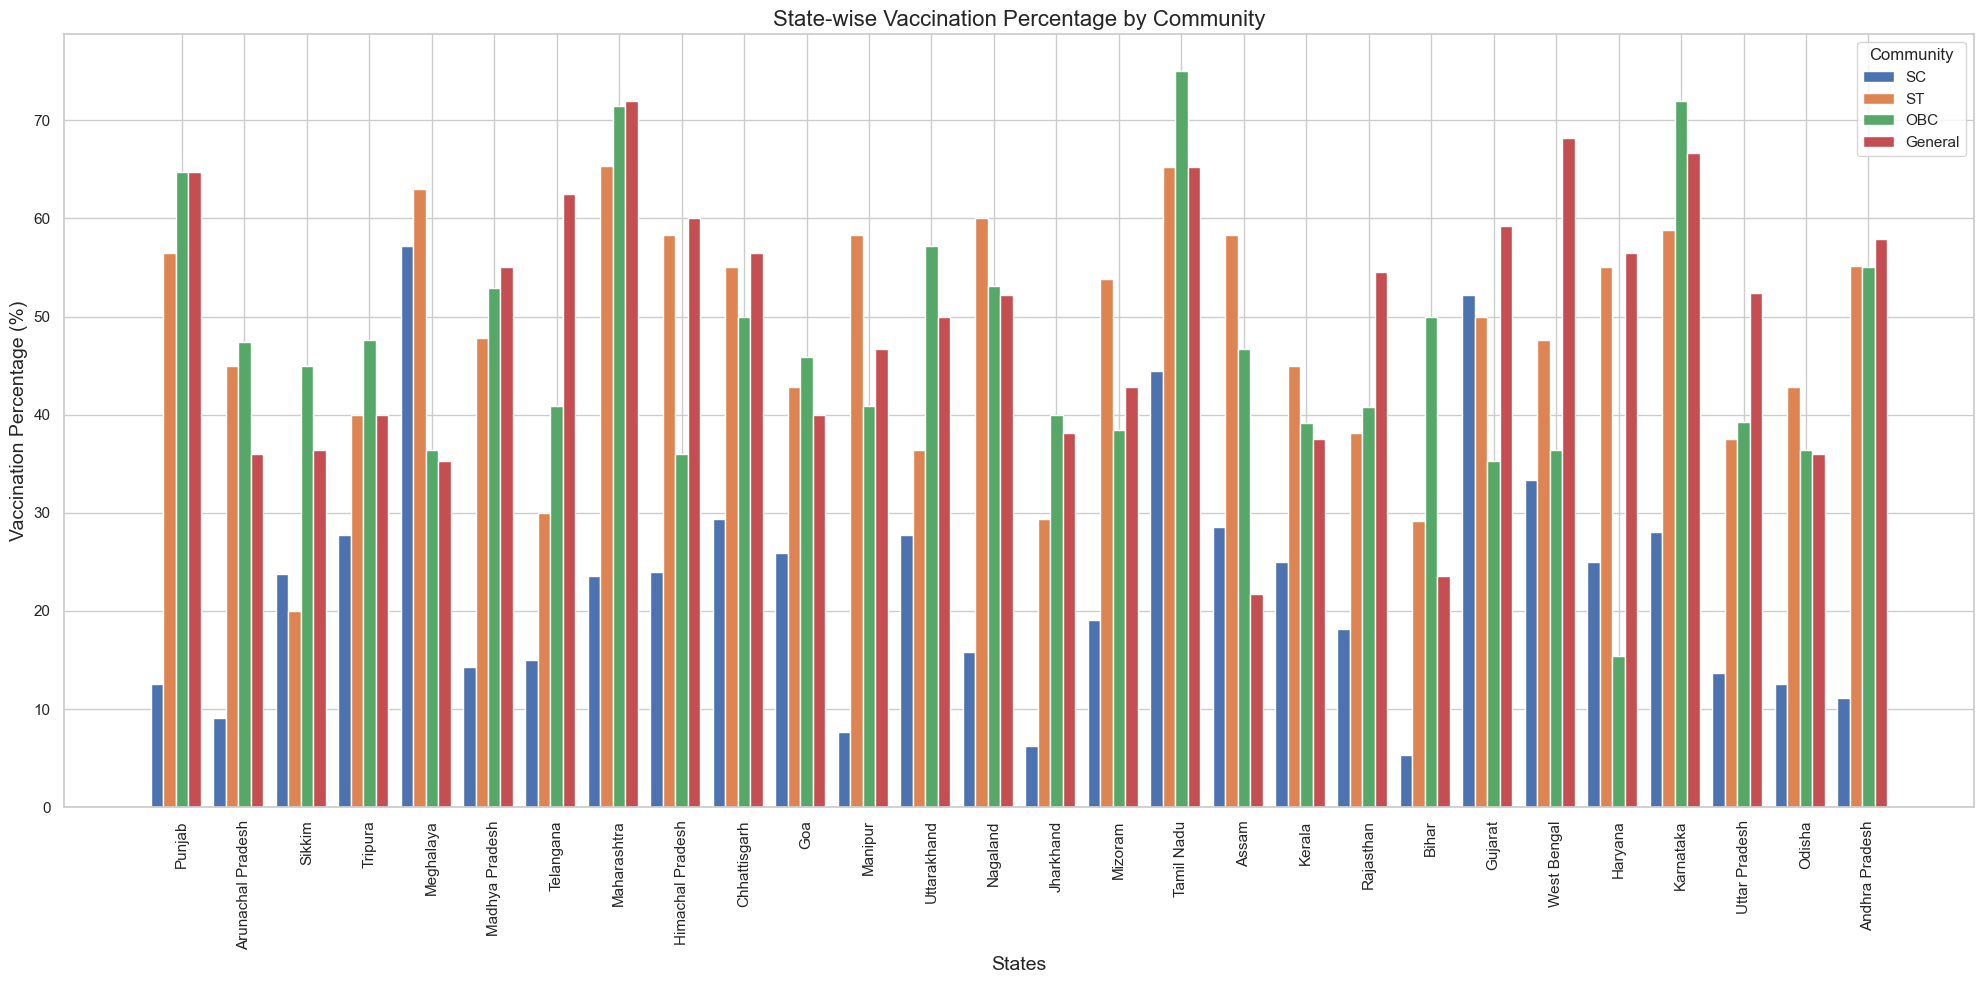

In [87]:
state_community_wise_vaccinated_count = dict()
communities = data["Community"].unique()
for state in states:
    state_community_wise_vaccinated_count[state] = {}
    for community in communities:
        vaccinated_count = len(data[(data["State"] == state) & (data["Community"] == community) & (data["Vaccination_Status"] == 1)])
        total_count = vaccinated_count + len(data[(data["State"] == state) & (data["Community"] == community) & (data["Vaccination_Status"] == 0)])
        state_community_wise_vaccinated_count[state][community] = (vaccinated_count / total_count) * 100 if total_count > 0 else 0
states = list(state_community_wise_vaccinated_count.keys())
x = np.arange(len(states)) 
width = 0.2  
plt.figure(figsize=(20, 10))
for i, community in enumerate(communities):
    community_percentages = [state_community_wise_vaccinated_count[state].get(community, 0) for state in states]
    plt.bar(x + i*width - (width*len(communities)/2), community_percentages, width, label=community)

# Labeling
plt.xlabel('States', fontsize=14)
plt.ylabel('Vaccination Percentage (%)', fontsize=14)
plt.title('State-wise Vaccination Percentage by Community', fontsize=16)
plt.xticks(x, states, rotation=90)
plt.legend(title="Community")

plt.tight_layout()
plt.show()

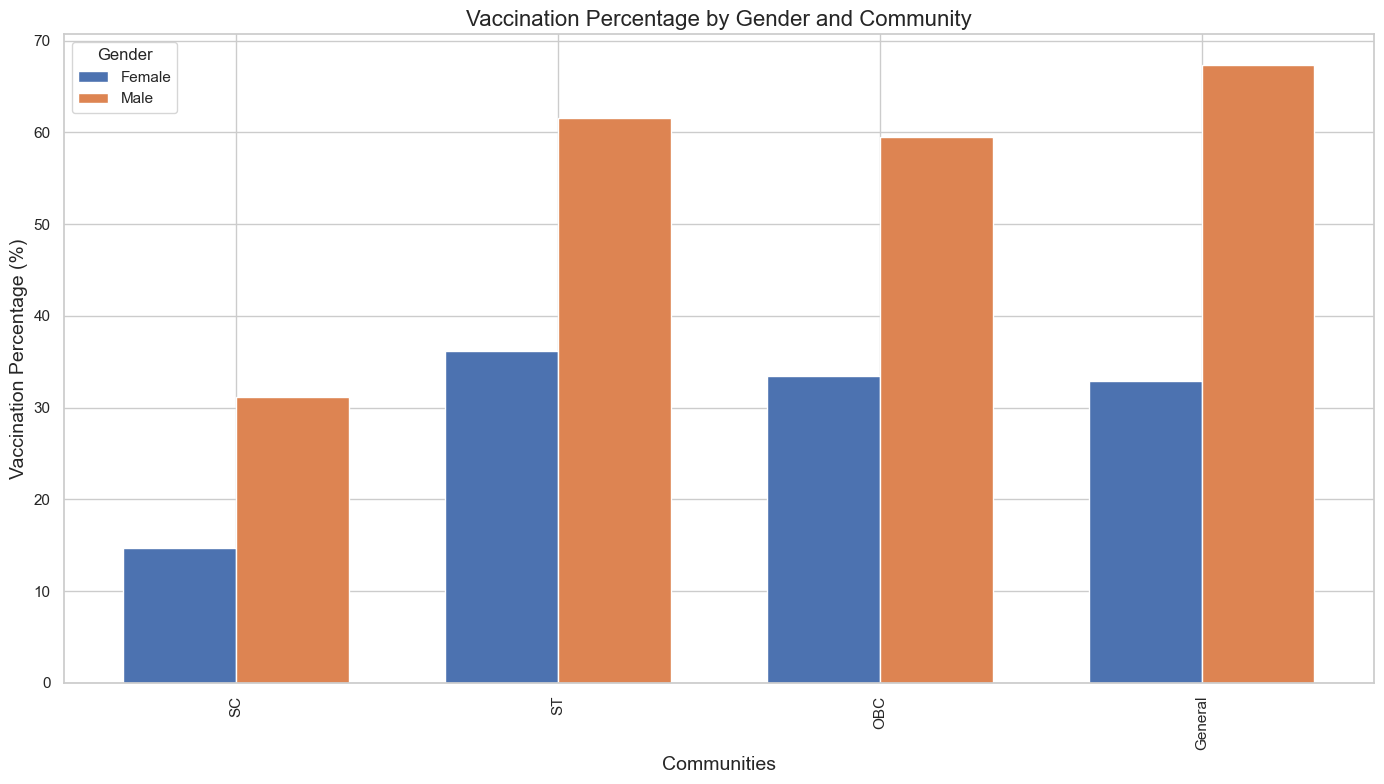

In [88]:
community_gender_wise_vaccinated_count = dict()
communities = data["Community"].unique()
genders = data["Gender"].unique()
for community in communities:
    community_gender_wise_vaccinated_count[community] = {}
    for gender in genders:
        vaccinated_count = len(data[(data["Community"] == community) & (data["Gender"] == gender) & (data["Vaccination_Status"] == 1)])
        total_count = vaccinated_count + len(data[(data["Community"] == community) & (data["Gender"] == gender) & (data["Vaccination_Status"] == 0)])
        community_gender_wise_vaccinated_count[community][gender] = (vaccinated_count / total_count) * 100 if total_count > 0 else 0

communities = list(community_gender_wise_vaccinated_count.keys())
x = np.arange(len(communities))  
width = 0.35  
plt.figure(figsize=(14, 8))
for i, gender in enumerate(genders):
    gender_percentages = [community_gender_wise_vaccinated_count[community].get(gender, 0) for community in communities]
    plt.bar(x + i*width - width/2, gender_percentages, width, label=gender)
plt.xlabel('Communities', fontsize=14)
plt.ylabel('Vaccination Percentage (%)', fontsize=14)
plt.title('Vaccination Percentage by Gender and Community', fontsize=16)
plt.xticks(x, communities, rotation=90)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [ ]:
age